In [1]:
# Importação das bibliotecas
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import shapely
import matplotlib.pyplot as plt

In [2]:
gdf_solos = gpd.read_file('../dados/solos')

gdf_solos.head()

,UMAP,LEGENDA_81,LEGENDA_99,GGRUPO_99,CLASSE_99,AREA_HA,TEXTURA,RELEVO,CLIMA,FERT_CORRE,PRAT_CONS,VEGETACAO,MECANIZACA,PRIM_NIVEL,geometry
0,Ae,Ae,Rube,NEOSSOLO FLÚVICO Eutrófico,NEOSSOLO FLÚVICO Tb Eutrófico típico,2894.47,argilosa,pl,Cfa,F2,C1,fl. trop. de varzea,M1,Neossolo,"POLYGON ((388771.393 7508623.834, 388609.210 7..."
1,LRe1,LRe1,LVef1,LATOSSOLOS VERMELHOS Eutroférricos,LATOSSOLO VERMELHO Eutroférrico típico,31594.89,argilosa,so + p,Cfa,F1,C1,fl. trop. peren.,M1,Latossolo,"POLYGON ((388191.371 7507711.820, 388490.092 7..."
2,LEd2,LEd2,LVd19,LATOSSOLOS VERMELHOS Distróficos,LATOSSOLO VERMELHO Distrófico típico,350242.49,média,so + p,Cfa,F3,C2,fl. trop. subperen.,M2,Latossolo,"POLYGON ((388191.371 7507711.820, 388360.213 7..."
3,TRe3,TRe3,NVef3,NITOSSOLOS VERMELHOS Eutroférricos,NITOSSOLO VERMELHO Eutroférrico típico,29736.84,argilosa,so + o,Cfa,F1,C1,fl. trop. subperen.,M1,Nitossolo,"POLYGON ((396570.447 7505506.021, 396101.028 7..."
4,PV3,PV3,PVd2,ARGISSOLOS VERMELHOS Distróficos,ARGISSOLO VERMELHO Distrófico típico,82825.08,aren./méd.,so,Cwa/Cfa,F3,C3,fl. trop. subperen.,M2,Argissolo,"POLYGON ((396570.447 7505506.021, 396757.840 7..."


<AxesSubplot: >

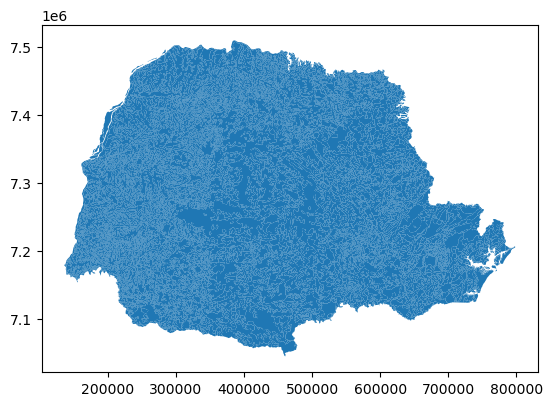

In [3]:
gdf_solos.plot()

In [4]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')


gdf = gpd.GeoDataFrame(
    gdf_solos)
gdf = gdf.set_crs(df_places.crs)
# gdf = gdf.to_crs(df_places.crs)


<AxesSubplot: >

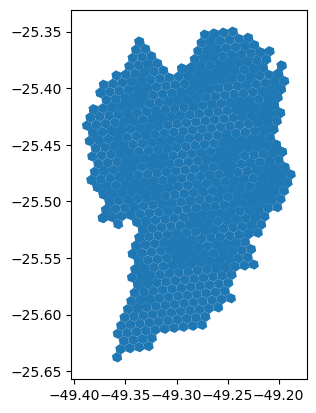

In [5]:
df_places.plot()

In [6]:
# df_merged = df_places.merge(gdf_solos, left_on=["lat", "long"], right_on=["lat", "long"])
gdf_solos = gdf_solos.set_crs("EPSG:22522")
# gdf_solos = gdf_solos.set_crs("EPSG:4326")
gdf_solos = gdf_solos.to_crs(df_places.crs)
df_merged = gpd.sjoin(df_places, gdf_solos, how="inner", predicate="intersects")
df_merged.head() 

,date,score,hex,NOME,geometry,index_right,UMAP,LEGENDA_81,LEGENDA_99,GGRUPO_99,CLASSE_99,AREA_HA,TEXTURA,RELEVO,CLIMA,FERT_CORRE,PRAT_CONS,VEGETACAO,MECANIZACA,PRIM_NIVEL
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5...",2786,Ca38,Ca38,CXbd11,CAMBISSOLOS HÁPLICOS Tb Distróficos,CAMBISSOLO HÁPLICO Tb Distrófico típico + NEOS...,7337.02,média,so,Cfb,F4,C3,campo subtropical,M3,Cambissolo
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5...",2786,Ca38,Ca38,CXbd11,CAMBISSOLOS HÁPLICOS Tb Distróficos,CAMBISSOLO HÁPLICO Tb Distrófico típico + NEOS...,7337.02,média,so,Cfb,F4,C3,campo subtropical,M3,Cambissolo
2,2020-04-01,100,88a831acebfffff,BAIRRO NOVO,"POLYGON ((-49.26539 -25.53675, -49.26124 -25.5...",2786,Ca38,Ca38,CXbd11,CAMBISSOLOS HÁPLICOS Tb Distróficos,CAMBISSOLO HÁPLICO Tb Distrófico típico + NEOS...,7337.02,média,so,Cfb,F4,C3,campo subtropical,M3,Cambissolo
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",2786,Ca38,Ca38,CXbd11,CAMBISSOLOS HÁPLICOS Tb Distróficos,CAMBISSOLO HÁPLICO Tb Distrófico típico + NEOS...,7337.02,média,so,Cfb,F4,C3,campo subtropical,M3,Cambissolo
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",2786,Ca38,Ca38,CXbd11,CAMBISSOLOS HÁPLICOS Tb Distróficos,CAMBISSOLO HÁPLICO Tb Distrófico típico + NEOS...,7337.02,média,so,Cfb,F4,C3,campo subtropical,M3,Cambissolo


In [9]:
df_merged_minor = df_merged[["hex", "geometry", "UMAP", "LEGENDA_81", "LEGENDA_99", "GGRUPO_99", "CLASSE_99", "AREA_HA", "TEXTURA", "RELEVO", "CLIMA", "FERT_CORRE", "PRAT_CONS", "VEGETACAO", "MECANIZACA", "PRIM_NIVEL"]]

<AxesSubplot: >

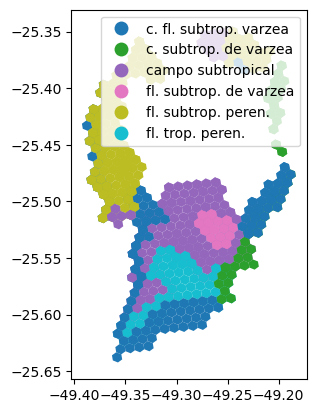

In [8]:
df_merged.plot(column="VEGETACAO", legend=True)

In [10]:
df_merged_minor.to_csv("../dados/feature_solo.csv")